In [49]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az

In [59]:
control_prices = [30, 40, 55]
treatment_prices = [35, 45, 60]

control = np.concatenate(
    (
        np.zeros(950), 
        np.array(np.random.choice(control_prices, 50)),
    )
)
treatment = np.concatenate(
    (
        np.zeros(970), 
        np.array(np.random.choice(treatment_prices, 30)),
    )
)

In [60]:
print("control", "------------------", pd.DataFrame(control).describe(), sep="\n")
print()
print("treatment", "------------------", pd.DataFrame(treatment).describe(), sep="\n")

control
------------------
                 0
count  1000.000000
mean      2.140000
std       9.594919
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      55.000000

treatment
------------------
                 0
count  1000.000000
mean      1.405000
std       8.207822
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      60.000000


In [62]:
mu = np.mean(control)
sigma = np.std(control)

with pm.Model() as model:
    _mu = pm.Normal("mean", mu=mu, sigma=sigma)
    _sigma = pm.HalfNormal("std", sigma=sigma)
    data = pm.TruncatedNormal(
        "Money", 
        mu=_mu,
        sigma=_sigma,
        lower=0,
        observed=control,
    )
    control_idata = pm.sample()
with pm.Model() as model:
    _mu = pm.Normal("mean", mu=mu, sigma=sigma)
    _sigma = pm.HalfNormal("std", sigma=sigma)
    data = pm.TruncatedNormal(
        "Money", 
        mu=_mu,
        sigma=_sigma,
        lower=0,
        observed=treatment,
    )
    treatment_idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mean, std]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mean, std]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.


# Why is this negative? None of the raw values are negative.

array([<AxesSubplot: title={'center': 'mean'}>,
       <AxesSubplot: title={'center': 'std'}>], dtype=object)

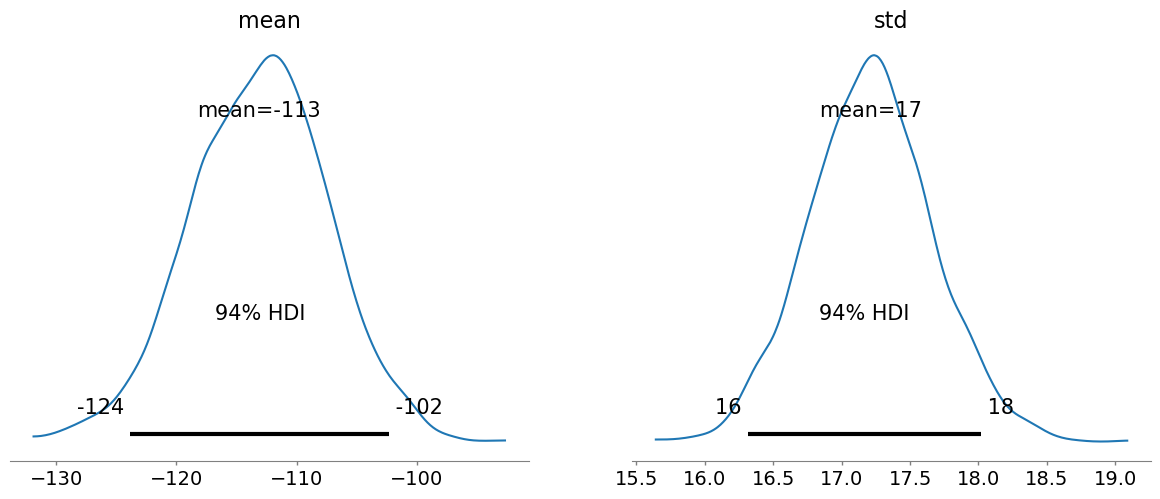

In [63]:
az.plot_posterior(control_idata.posterior)

array([<AxesSubplot: title={'center': 'mean'}>,
       <AxesSubplot: title={'center': 'std'}>], dtype=object)

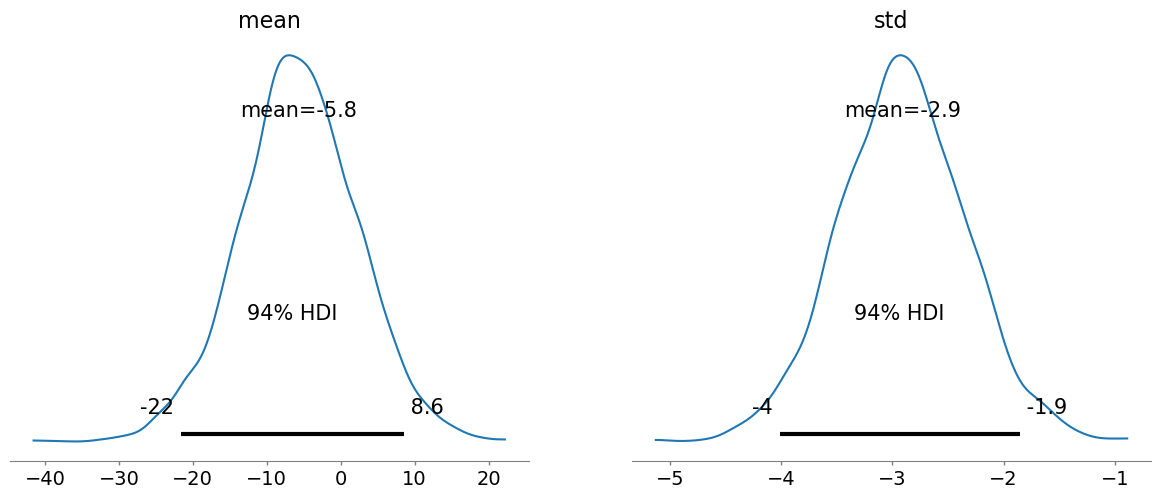

In [64]:
az.plot_posterior(treatment_idata.posterior - control_idata.posterior)